In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#Getting the dataset for marketing analytics
dataset = pd.read_csv('customer_purchase_data.csv')
dataset.head()

,Customer_ID,Age,Region,Household_Size,Membership_Status,Total_Purchases,Average_Purchase_Value,Total_Spending
0,1,56,North,1,Non-Member,6,159.58,957.48
1,2,46,West,2,Member,15,153.79,2306.83
2,3,32,North,1,Member,10,110.11,1101.11
3,4,60,East,5,Non-Member,27,205.78,5556.12
4,5,25,North,4,Member,38,114.47,4349.74


In [4]:
#Univariate analysis of the data
new_data = dataset[['Age', 'Household_Size', 'Total_Purchases', 'Total_Spending']].agg(['mean', 'max', 'std', 'median'])
new_data

,Age,Household_Size,Total_Purchases,Total_Spending
mean,41.068554,2.979136,18.350969,2746.956013
max,64.000000,5.000000,58.000000,12199.630000
std,13.528154,1.431877,11.727953,2039.587490
median,42.000000,3.000000,16.000000,2225.760000


In [5]:
#Multivariate analysis for total spending with correlation
numerical_columns = dataset.select_dtypes(include=['number'])
correlation_for_numerical = numerical_columns.corr()[['Total_Spending']]
correlation_for_numerical



,Total_Spending
Customer_ID,-0.026816
Age,0.310560
Household_Size,0.725346
Total_Purchases,0.930628
Average_Purchase_Value,0.517013
Total_Spending,1.000000


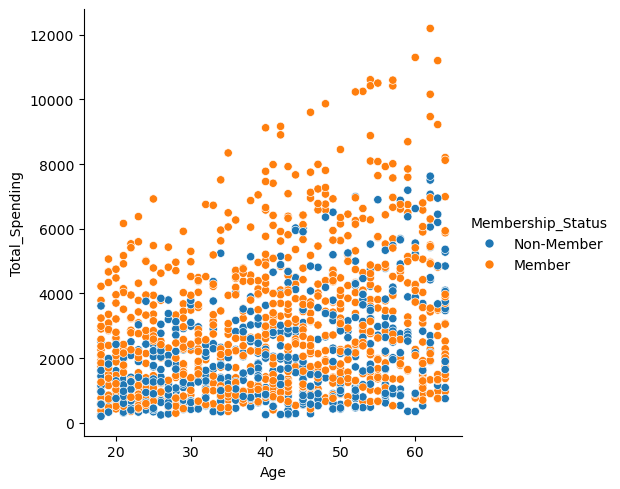

In [6]:
#Scatter plot for total spending and age
sns.relplot(x = 'Age', y = 'Total_Spending', data = dataset, kind = "scatter", hue = "Membership_Status")
#With this visualization, we can see that members who are older have bigger total spending.
#Also, the distribution among members is much larger compared to non-members

Text(0.5, 1.0, 'Total Spending by Region and Membership Status')

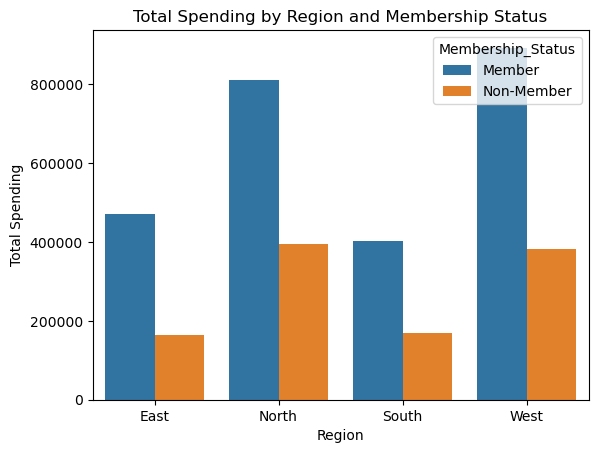

In [7]:
#Bar chart for total spending by region and membership status

grouped_data = dataset.groupby(['Region', 'Membership_Status'])['Total_Spending'].sum().reset_index()

sns.barplot(x= 'Region', y= 'Total_Spending', hue= 'Membership_Status', data= grouped_data)

plt.ylabel('Total Spending')
plt.title('Total Spending by Region and Membership Status')


#We can see that west and north are dominating in spending compared to east and south


Text(0.5, 1.0, '% of total purchases by member status')

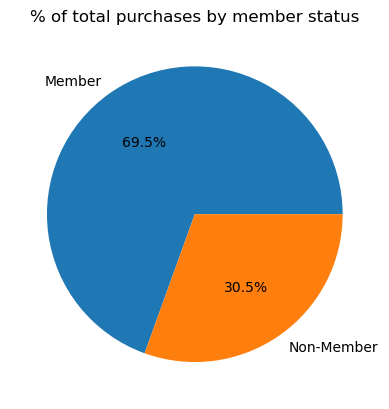

In [8]:
#Pie chart based on member type and their total purchases
grouped_data = dataset.groupby('Membership_Status')['Total_Purchases'].sum()

plt.pie(grouped_data, labels = grouped_data.index, autopct='%1.1f%%')

plt.title('% of total purchases by member status')

#We can see, that member's have made slightly more purchases

Text(0, 0.5, 'Total spending')

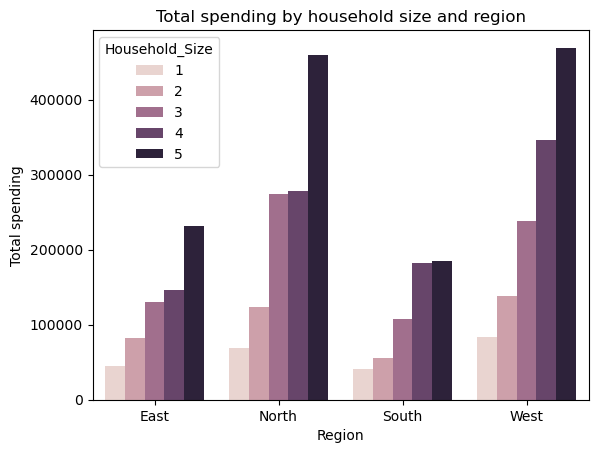

In [9]:
#Countplot to see the count of household sizes as membership status being legend
grouped_data = dataset.groupby(['Household_Size', 'Region'])['Total_Spending'].sum().reset_index()
sns.barplot(x = 'Region', y = 'Total_Spending', hue = 'Household_Size', data = grouped_data)

plt.title('Total spending by household size and region')
plt.ylabel('Total spending')

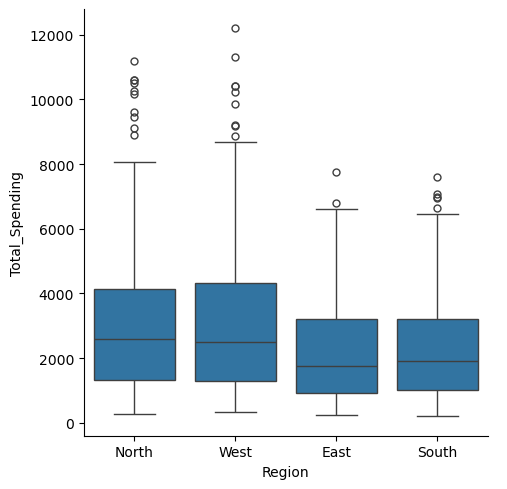

In [10]:
#boxplot based on region and total spending
sns.catplot(x = "Region", y = "Total_Spending", data = dataset, kind = "box")
#With this visualization, we can see that total spending in north and west have more outliers.
#The median is almost the same with all 4 regions, which is interesting.

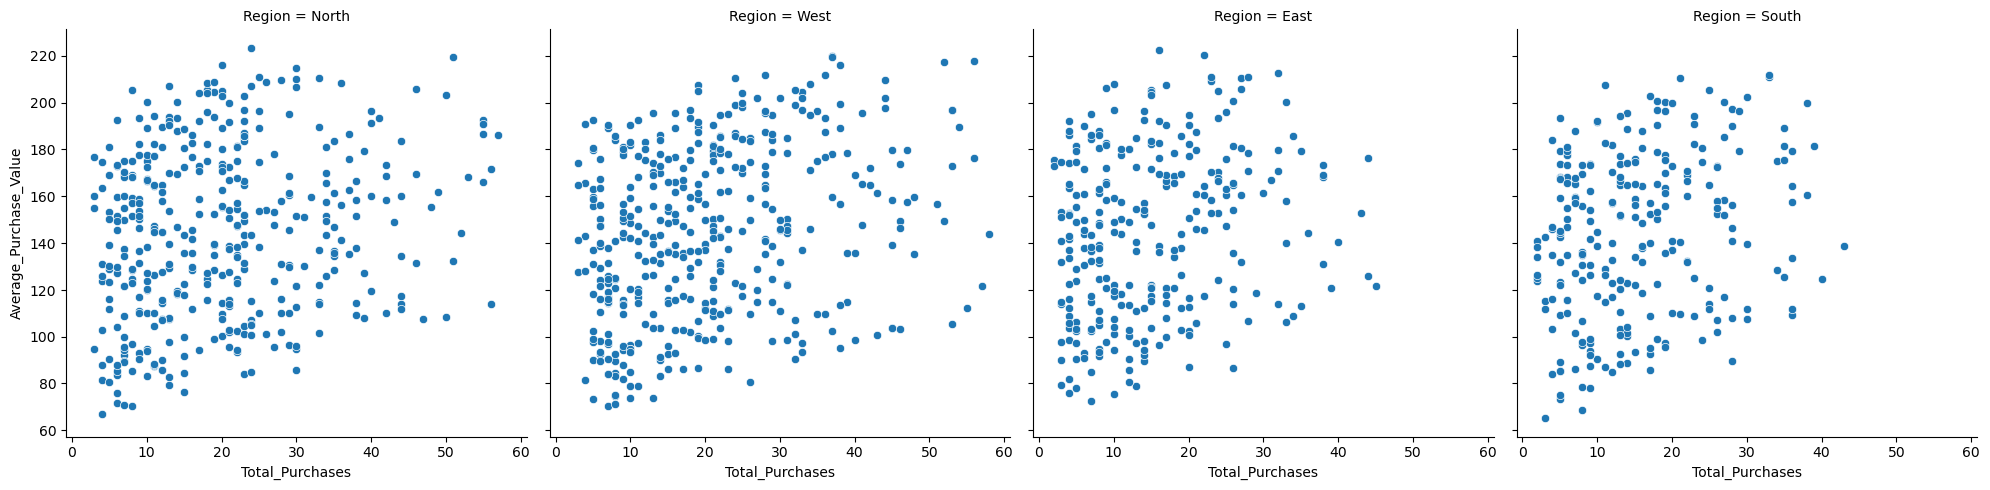

In [11]:
sns.relplot(x = 'Total_Purchases', y = 'Average_Purchase_Value', data = dataset, kind = "scatter", col = 'Region')
#With this scatterplot, we can see that north and west have larger distribution, and some purchases exceed over quantity of 50


In [12]:
#T-test to test hypotheses
from scipy import stats
#Hypothesis 1: Membership type and it's influence on total spending
Membership = dataset[dataset['Membership_Status'] == 'Member']['Total_Spending']
No_Membership = dataset[dataset['Membership_Status'] == 'Non-Member']['Total_Spending']

T_test_1, P_value = stats.ttest_ind(Membership, No_Membership)
print(f"The T-test for membership status and total spending: T-test: {T_test_1}, P-value: {P_value}")

#Hypothesis 2: Lowest and highest household size and it's influence on total spending
Household_Size_1 = dataset[dataset['Household_Size'] == 1]['Total_Spending']
Household_Size_5 = dataset[dataset['Household_Size'] == 5]['Total_Spending']

T_test_2, P_value_2 = stats.ttest_ind(Household_Size_1, Household_Size_5)
print(f"The T-test for lowest and highest household size for total spending: T-test: {T_test_2}, P-value: {P_value_2}")


The T-test for membership status and total spending: T-test: 9.11642154134799, P-value: 2.7583329276910336e-19
The T-test for lowest and highest household size for total spending: T-test: -32.55650512817006, P-value: 2.3153029522686295e-131


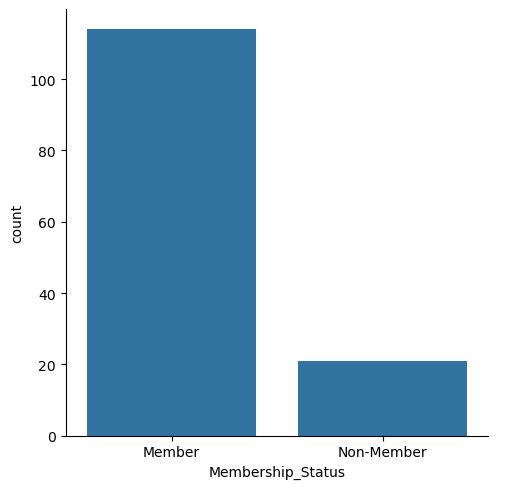

In [13]:
#Analyzing the top 10% customers with the highest total spending
grouped_data = dataset.groupby('Customer_ID')['Total_Spending'].sum()
quantile = grouped_data.quantile(0.90)
top_10_percent_customers = grouped_data[grouped_data >= quantile]

top_customers_data = dataset.merge(top_10_percent_customers, on="Customer_ID")

sns.catplot(x="Membership_Status", data=top_customers_data, kind="count")
#We can see, that around just above 20 customers who are not members are included in the top 10%, rest of the customers are members'

/tmp/ipykernel_162/1605027835.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = dataset.groupby('Consumer_type')['Total_Spending'].sum().reset_index()


Text(0.5, 1.0, 'Total spending by spending groups')

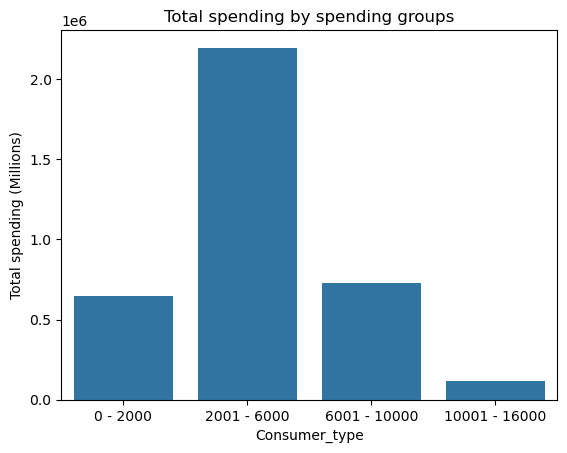

In [14]:
#Categorizing customers by their total spending
bins = [0, 2000, 6000, 10000, 16000]
labels = ['0 - 2000', '2001 - 6000', '6001 - 10000', '10001 - 16000']

dataset['Consumer_type'] = pd.cut(dataset['Total_Spending'], bins, labels = labels)

grouped_data = dataset.groupby('Consumer_type')['Total_Spending'].sum().reset_index()

sns.barplot(x = 'Consumer_type', y = 'Total_Spending', data = grouped_data)

plt.ylabel('Total spending (Millions)')
plt.title('Total spending by spending groups')

#We can see, that consumers spending between 2001 and 6000 contribute the most to the total spending.

In [15]:
#My recommendations moving forward:

#1. Advertise the membership more often, because it the data shows that it has a very positive influence on customer's total spending
#Especially increasing the advertisement of membership in east and south regions, which have the lowest total spending and less members

#2. The household size affects total spending a lot. The barplot visualization shows that different households have much bigger contribution to the total spending in north and west region
#Therefore, the strategy should be to consider focusing more on the east and south households, and advertise memberships to these regions and households in these regions.

In [16]:
#Sales analytics 


In [17]:
#Getting the sales dataset 
sales_data = pd.read_csv('sales_data.csv')


In [18]:
#Investigating the data
sales_data.head()

,Store_ID,Region,Store_Area,Number_of_Employees,Customer_Footfall,Monthly_Sales
0,1,South,3875.0,48.0,3022.0,30367
1,2,West,3167.0,41.0,1914.0,34514
2,3,West,2271.0,30.0,1690.0,18853
3,4,East,3367.0,43.0,1220.0,10719
4,5,North,1363.0,23.0,1086.0,12962


In [19]:
#Identifying missing values 
missing_values = sales_data.isnull().sum()
missing_values

Store_ID                 0
Region                   0
Store_Area             124
Number_of_Employees     74
Customer_Footfall       99
Monthly_Sales            0
dtype: int64

In [20]:
#Replacing missing values with the mean value
sales_data['Store_Area'].fillna(sales_data['Store_Area'].mean(), inplace = True)
sales_data['Number_of_Employees'].fillna(sales_data['Number_of_Employees'].mean(), inplace = True)
sales_data['Customer_Footfall'].fillna(sales_data['Customer_Footfall'].mean(), inplace = True)

/tmp/ipykernel_162/3992470505.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_data['Store_Area'].fillna(sales_data['Store_Area'].mean(), inplace = True)
/tmp/ipykernel_162/3992470505.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

In [21]:
#Checking if the replacement of missing values worked
missing_values = sales_data.isnull().sum()
missing_values

Store_ID               0
Region                 0
Store_Area             0
Number_of_Employees    0
Customer_Footfall      0
Monthly_Sales          0
dtype: int64

<Axes: xlabel='Customer_Footfall'>

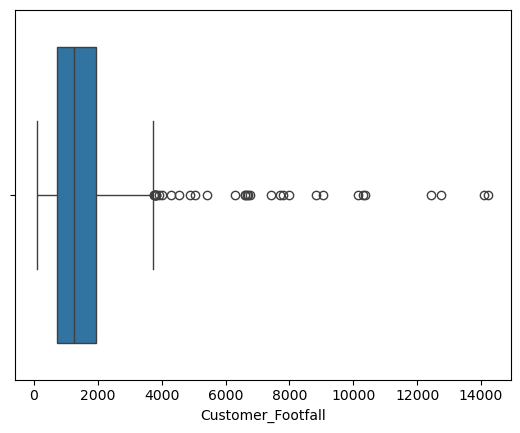

In [22]:
#Identifying outliers in customer footfall with boxplot

sns.boxplot(x = sales_data['Customer_Footfall'], data = sales_data)


<Axes: xlabel='Store_Area'>

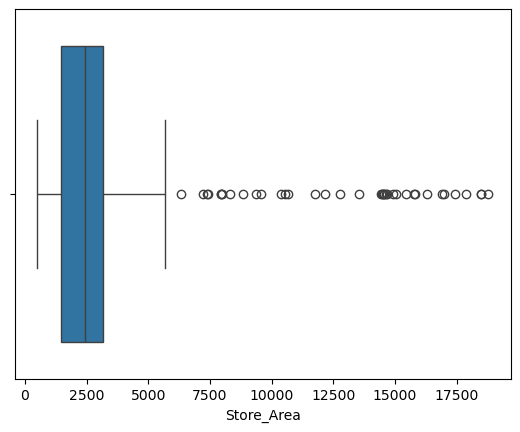

In [29]:
#Identifying outliers in store area with box plot
sns.boxplot(x = sales_data['Store_Area'], data = sales_data)


<Axes: xlabel='Number_of_Employees'>

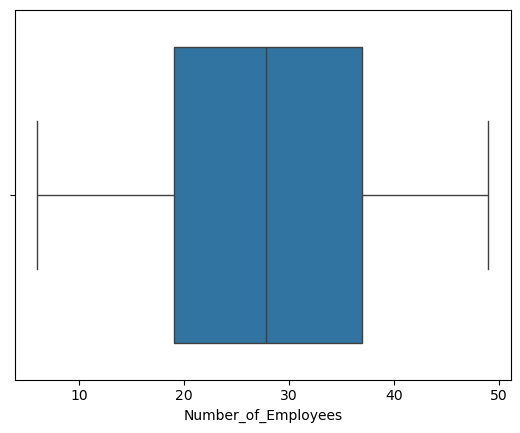

In [25]:
#Identifying outliers in number of employees
sns.boxplot(x = sales_data['Number_of_Employees'], data = sales_data)


<Axes: xlabel='Monthly_Sales'>

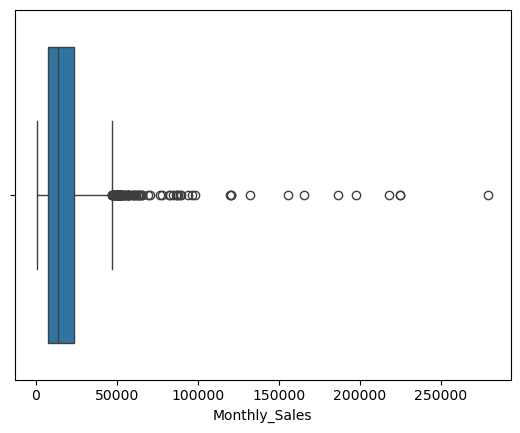

In [26]:
#Identifying outliers in monthly sales
sns.boxplot(x = sales_data['Monthly_Sales'], data = sales_data)


In [38]:
#Removing outliers that are 3 std away from mean
# []

sales_data_stores_mean = sales_data['Store_Area'].mean()
sales_data_stores_std = sales_data['Store_Area'].std()

sales_data_employees_mean = sales_data['Number_of_Employees'].mean()
sales_data_employees_std = sales_data['Number_of_Employees'].std()

sales_data_footfall_mean = sales_data['Customer_Footfall'].mean()
sales_data_footfall_std = sales_data['Customer_Footfall'].std()

sales_data_sales_mean = sales_data['Monthly_Sales'].mean()
sales_data_sales_std = sales_data['Monthly_Sales'].std()

cut_off = 3

lower_store_area = sales_data_stores_mean - (cut_off * sales_data_stores_std)
upper_store_area = sales_data_stores_mean + (cut_off * sales_data_stores_std)

lower_employees = sales_data_employees_mean - (cut_off * sales_data_employees_std)
upper_employees = sales_data_employees_mean + (cut_off * sales_data_employees_std)

lower_footfall = sales_data_footfall_mean - (cut_off * sales_data_footfall_std)
upper_footfall = sales_data_footfall_mean + (cut_off * sales_data_footfall_std)

lower_sales = sales_data_sales_mean - (cut_off * sales_data_sales_std)
upper_sales = sales_data_sales_mean + (cut_off * sales_data_sales_std)

sales_data_cleaned = sales_data[
    (sales_data['Store_Area'] >= lower_store_area) & (sales_data['Store_Area'] <= upper_store_area) &
    (sales_data['Number_of_Employees'] >= lower_employees) & (sales_data['Number_of_Employees'] <= upper_employees) &
    (sales_data['Customer_Footfall'] >= lower_footfall) & (sales_data['Customer_Footfall'] <= upper_footfall) &
    (sales_data['Monthly_Sales'] >= lower_sales) & (sales_data['Monthly_Sales'] <= upper_sales)
]



In [39]:
#Normalizing the numerical values to ensure compability
from sklearn.preprocessing import MinMaxScaler

# Create MinMaxScaler
data_min_max_scaler = MinMaxScaler()

# Fit the scaler to the selected columns
data_min_max_scaler.fit(sales_data_cleaned[['Store_Area', 'Number_of_Employees', 'Customer_Footfall', 'Monthly_Sales']])

# Transform the data
new_data = data_min_max_scaler.transform(sales_data_cleaned[['Store_Area', 'Number_of_Employees', 'Customer_Footfall', 'Monthly_Sales']])

# Assign the transformed values back to the dataframe
sales_data_cleaned[['Store_Area_scaled', 'Number_of_Employees_scaled', 'Customer_Footfall_scaled', 'Monthly_Sales_scaled']] = new_data

sales_data_cleaned.head()



/tmp/ipykernel_162/1293091702.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_cleaned[['Store_Area_scaled', 'Number_of_Employees_scaled', 'Customer_Footfall_scaled', 'Monthly_Sales_scaled']] = new_data
/tmp/ipykernel_162/1293091702.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_cleaned[['Store_Area_scaled', 'Number_of_Employees_scaled', 'Customer_Footfall_scaled', 'Monthly_Sales_scaled']] = new_data
/tmp/ipykernel_162/1293091702.py:14: SettingWithCopyWarning: 
A value is try

,Store_ID,Region,Store_Area,Number_of_Employees,Customer_Footfall,Monthly_Sales,Store_Area_scaled,Number_of_Employees_scaled,Customer_Footfall_scaled,Monthly_Sales_scaled
0,1,South,3875.0,48.0,3022.0,30367,0.487921,0.976744,0.655638,0.432523
1,2,West,3167.0,41.0,1914.0,34514,0.385506,0.813953,0.406257,0.493315
2,3,West,2271.0,30.0,1690.0,18853,0.255895,0.558140,0.355841,0.263736
3,4,East,3367.0,43.0,1220.0,10719,0.414437,0.860465,0.250056,0.144497
4,5,North,1363.0,23.0,1086.0,12962,0.124548,0.395349,0.219896,0.177378


In [44]:
#Creating new performance metric column using monthly sales, store size and customer footfall

sales_data_cleaned['Performance_metric'] = (
    (sales_data_cleaned['Store_Area_scaled'] * sales_data_cleaned['Store_Area']) +
    (sales_data_cleaned['Customer_Footfall_scaled'] * sales_data_cleaned['Customer_Footfall']) +
    (sales_data_cleaned['Monthly_Sales_scaled'] * sales_data_cleaned['Monthly_Sales'])
) / (sales_data_cleaned['Store_Area'] + sales_data_cleaned['Customer_Footfall'] + sales_data_cleaned['Monthly_Sales'])

sales_data_cleaned.head()
#The performance metric illustrates the total performance of the store area, sales and customer footfall all-together from the maximal performance.
#The value for the performance metric is between 0 - 1, and the closed the metric is to 1, the higher the performance is when sales, footfall and store are put together.




/tmp/ipykernel_162/2779224540.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_cleaned['Performance_metric'] = (


,Store_ID,Region,Store_Area,Number_of_Employees,Customer_Footfall,Monthly_Sales,Store_Area_scaled,Number_of_Employees_scaled,Customer_Footfall_scaled,Monthly_Sales_scaled,Performance_metric
0,1,South,3875.0,48.0,3022.0,30367,0.487921,0.976744,0.655638,0.432523,0.456378
1,2,West,3167.0,41.0,1914.0,34514,0.385506,0.813953,0.406257,0.493315,0.480484
2,3,West,2271.0,30.0,1690.0,18853,0.255895,0.558140,0.355841,0.263736,0.269778
3,4,East,3367.0,43.0,1220.0,10719,0.414437,0.860465,0.250056,0.144497,0.212292
4,5,North,1363.0,23.0,1086.0,12962,0.124548,0.395349,0.219896,0.177378,0.175702


In [46]:
#Transforming the regions for machine learning by using dummy values
dummy = pd.get_dummies(sales_data_cleaned, columns = ['Region'], drop_first = True, prefix = 'Region')

dummy.head()

,Store_ID,Store_Area,Number_of_Employees,Customer_Footfall,Monthly_Sales,Store_Area_scaled,Number_of_Employees_scaled,Customer_Footfall_scaled,Monthly_Sales_scaled,Performance_metric,Region_North,Region_South,Region_West
0,1,3875.0,48.0,3022.0,30367,0.487921,0.976744,0.655638,0.432523,0.456378,False,True,False
1,2,3167.0,41.0,1914.0,34514,0.385506,0.813953,0.406257,0.493315,0.480484,False,False,True
2,3,2271.0,30.0,1690.0,18853,0.255895,0.558140,0.355841,0.263736,0.269778,False,False,True
3,4,3367.0,43.0,1220.0,10719,0.414437,0.860465,0.250056,0.144497,0.212292,False,False,False
4,5,1363.0,23.0,1086.0,12962,0.124548,0.395349,0.219896,0.177378,0.175702,True,False,False


<Axes: xlabel='Store_Size', ylabel='count'>

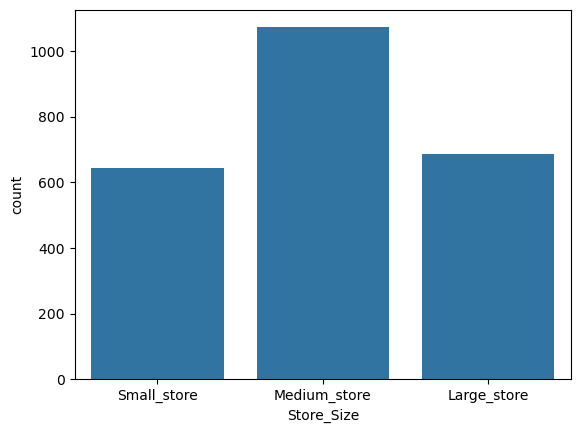

In [53]:
#Creating thresholds for store sizes

bins = [0, 1500, 3000, 10000]

labels = ['Small_store', 'Medium_store', 'Large_store']

dummy['Store_Size'] = pd.cut(dummy['Store_Area'], bins, labels = labels)

sns.countplot(x = 'Store_Size', data = dummy)

In [54]:
#What changes can be observed?
#The changes have added more columns that give more options for the data analyst to provide more possibilities for insightful analysis
#The data doesn't contain any nulls or outliers, which has a change on the accuracy of machine learning and predictive analytics.
#Adding the performance metric also benefits the user by helping to evaluate and track the performance of sales.
#Performance metric offers a quick look for the user to see the overall performance of sales, which saves time by not analyzing each column seperately.


#What are the benefits of data cleaning and transformation?
#The benefits are a more suitable data model for predictive analytics and machine learning.
#Data cleaning helps with providing more accurate image of the sales, which could lead to more accurate decision making based on the data analysis


<class 'pandas.core.frame.DataFrame'>
Index: 2405 entries, 0 to 2484
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Store_ID                    2405 non-null   int64   
 1   Store_Area                  2405 non-null   float64 
 2   Number_of_Employees         2405 non-null   float64 
 3   Customer_Footfall           2405 non-null   float64 
 4   Monthly_Sales               2405 non-null   int64   
 5   Store_Area_scaled           2405 non-null   float64 
 6   Number_of_Employees_scaled  2405 non-null   float64 
 7   Customer_Footfall_scaled    2405 non-null   float64 
 8   Monthly_Sales_scaled        2405 non-null   float64 
 9   Performance_metric          2405 non-null   float64 
 10  Region_North                2405 non-null   bool    
 11  Region_South                2405 non-null   bool    
 12  Region_West                 2405 non-null   bool    
 13  Store_Size             